In [3]:
import numpy as np
import scipy.io
import cv2
import time

In [110]:
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [111]:
def plot_onehidden(image):
    plt.axis('off')
    plt.imshow(image.reshape([20,20]),cmap='gray')

In [4]:
np.set_printoptions(suppress=True)

In [5]:
def show_img(img):
    t=img.copy()
    t=t.reshape(20,20)
    t=cv2.resize(t, (200, 200))
    cv2.imshow('image',t)
    cv2.resizeWindow('image', 200,200)
    cv2.waitKey(0)
    cv2.destroyAllWindows

In [103]:
mat = scipy.io.loadmat('..\pg_Eg\my_projects\ex3data1.mat')

m=5000
y=mat['y']
x=mat['X']
_y=np.zeros([5000,10])
theta=np.zeros([10,400])
_x=x


In [104]:
def create_training_and_test():
    
    for i in range(5000):
        if y[i][0]==10:
            _y[i][0]=1
        else:
            _y[i][y[i][0]]=1

In [105]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def hyp():
    global theta,_x
    z=np.dot(_x,np.transpose(theta))
    return sigmoid(z)

def cost():
    global _x,_y,m,theta
    h=hyp()
    return -(1.0/m)*np.sum((np.multiply(np.log(h),_y)+np.multiply(np.log(1-h),1-_y)))



In [106]:
def update_theta(alpha=0.5,num_iter=10000):
        global _x,_y,theta,m
        for it in range(num_iter):
            ha=hyp()-_y

            val=alpha*(1.0/m)*np.dot(np.transpose(ha),_x)
            theta=theta-val
            if it%(num_iter/100)==0:
                print 'iterations =',it,'cost = ',cost()
        print 'theta = ',theta

In [116]:
def predict(img_x):
    ret=sigmoid(np.dot(img_x,np.transpose(theta)))
    return ret,np.argmax(ret)

In [108]:
create_training_and_test()

In [109]:
update_theta()
print 'trained successfully'

iterations = 0 cost =  3.73731994874
iterations = 100 cost =  1.0425908582
iterations = 200 cost =  0.904456659995
iterations = 300 cost =  0.84274603167
iterations = 400 cost =  0.805254933928
iterations = 500 cost =  0.779043135655
iterations = 600 cost =  0.759188551996
iterations = 700 cost =  0.743352979708
iterations = 800 cost =  0.730260159148
iterations = 900 cost =  0.719144121557
iterations = 1000 cost =  0.709512460962
iterations = 1100 cost =  0.701031724149
iterations = 1200 cost =  0.693466674707
iterations = 1300 cost =  0.686645778914
iterations = 1400 cost =  0.680440476147
iterations = 1500 cost =  0.674752156016
iterations = 1600 cost =  0.669503666097
iterations = 1700 cost =  0.664633596571
iterations = 1800 cost =  0.660092328019
iterations = 1900 cost =  0.655839233122
iterations = 2000 cost =  0.651840653771
iterations = 2100 cost =  0.648068411425
iterations = 2200 cost =  0.644498691879
iterations = 2300 cost =  0.641111197772
iterations = 2400 cost =  0.6378

KeyboardInterrupt: 

In [16]:
print cost()
print theta

0.537319400675
[[ 0.          0.         -0.0000002  ..., -0.00030049  0.00001153  0.        ]
 [ 0.          0.          0.00002908 ...,  0.00131412  0.00000012  0.        ]
 [ 0.          0.         -0.0000395  ...,  0.00348639 -0.00040232  0.        ]
 ..., 
 [ 0.          0.         -0.00002442 ..., -0.00057433  0.00006805  0.        ]
 [ 0.          0.         -0.00002267 ..., -0.00117843  0.00012286  0.        ]
 [ 0.          0.         -0.00000275 ..., -0.00244483  0.00016798  0.        ]]


[5]
(array([ 0.00052703,  0.00000143,  0.00000004,  0.06110999,  0.00043385,
        0.99711092,  0.00000509,  0.00000232,  0.17160841,  0.00012516]), 5)


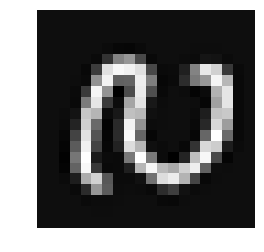

In [146]:
no=np.random.randint(5000)
print y[no]
print predict(_x[no])
plot_onehidden(_x[no])